In [1]:
# Importing Libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset :
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Shape of dataset :
df.shape

(299, 13)

In [4]:
# NaN Value cheaking :
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
# Desciption of dataset :
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

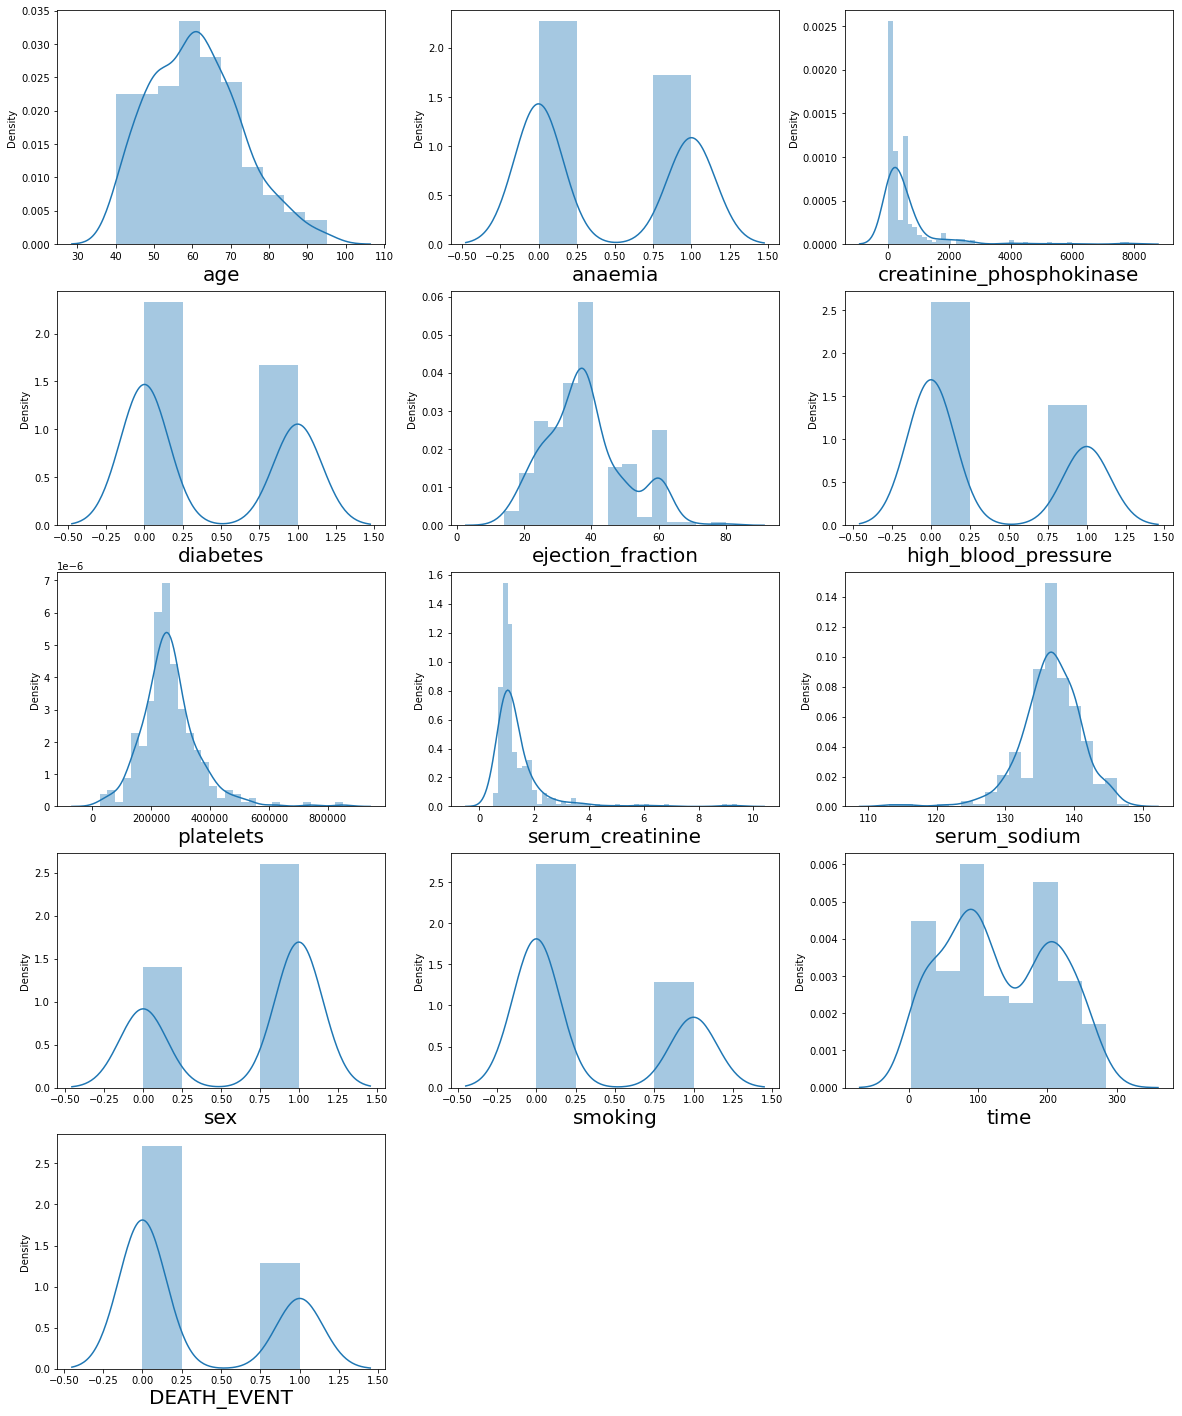

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

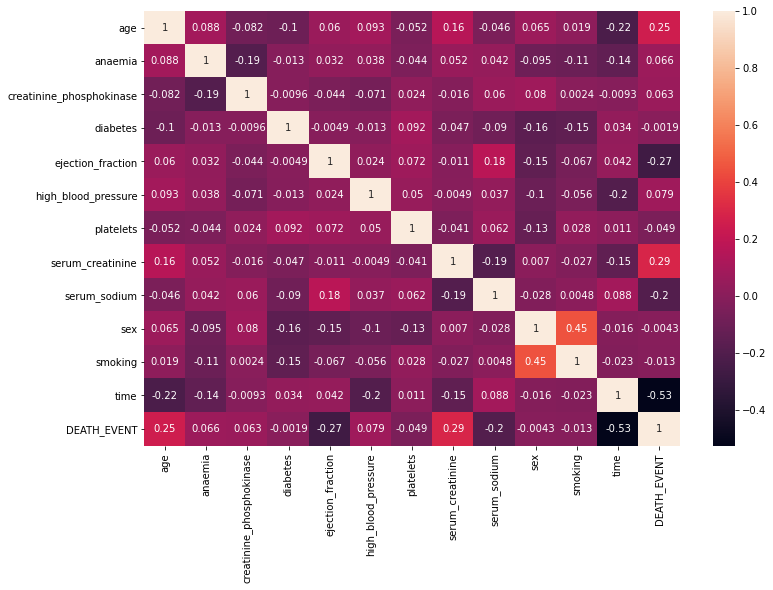

In [7]:
# Correlation :
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
print("Died People     : ", df['DEATH_EVENT'].value_counts()[1])
print("Non-Died People : ", df['DEATH_EVENT'].value_counts()[0])

Died People     :  96
Non-Died People :  203


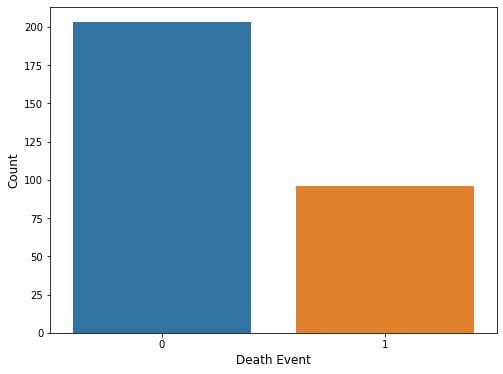

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='DEATH_EVENT')
plt.xlabel('Death Event', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [10]:
# Diabetes :
print("Diabetes People     : ", df['diabetes'].value_counts()[1])
print("Non-Diabetes People : ", df['diabetes'].value_counts()[0])

Diabetes People     :  125
Non-Diabetes People :  174


In [11]:
diab = df[df['diabetes'] == 1]
diab_no = df[df['diabetes'] == 0]

print("If a Person has Diabetes,")
print("\t\t\t", diab['DEATH_EVENT'].value_counts()[1], "people are died.")
print("\t\t\t", diab['DEATH_EVENT'].value_counts()[0], "people are not died.")

print("If Person hasn't Diabetes")
print("\t\t\t", diab_no['DEATH_EVENT'].value_counts()[1], "people are died.")
print("\t\t\t", diab_no['DEATH_EVENT'].value_counts()[0], "people are not died.")

If a Person has Diabetes,
			 40 people are died.
			 85 people are not died.
If Person hasn't Diabetes
			 56 people are died.
			 118 people are not died.


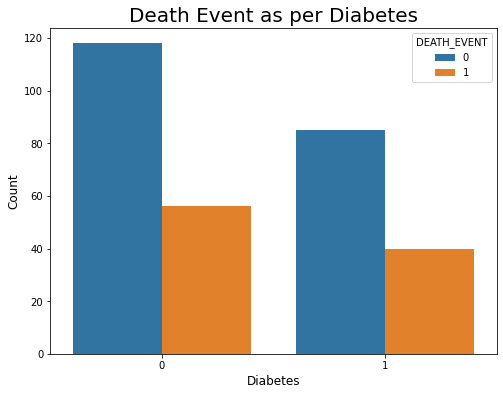

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='diabetes', hue='DEATH_EVENT')
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Death Event as per Diabetes", fontsize=20)
plt.show()

Diabetes People     :  125
Non-Diabetes People :  174
    
If a Person has Diabetes then 40 people are died and 85 people are not died.
If Person hasn't Diabetes then 56 people are died and 118 people are not died.

In [13]:
# Anaemia :
print("Anaemia People     : ", df['anaemia'].value_counts()[1])
print("Non-Anaemia People : ", df['anaemia'].value_counts()[0])

Anaemia People     :  129
Non-Anaemia People :  170


In [14]:
ana = df[df['anaemia'] == 1]
ana_no = df[df['anaemia'] == 0]

print("If a Person has Anaemia,")
print("\t\t\t", ana['DEATH_EVENT'].value_counts()[1], "people are died.")
print("\t\t\t", ana['DEATH_EVENT'].value_counts()[0], "people are not died.")

print("If Person hasn't Anaemia,")
print("\t\t\t", ana_no['DEATH_EVENT'].value_counts()[1], "people are died.")
print("\t\t\t", ana_no['DEATH_EVENT'].value_counts()[0], "people are not died.")

If a Person has Anaemia,
			 46 people are died.
			 83 people are not died.
If Person hasn't Anaemia,
			 50 people are died.
			 120 people are not died.


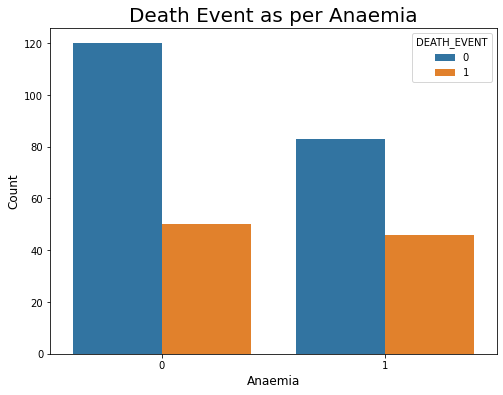

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')
plt.xlabel('Anaemia', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Death Event as per Anaemia", fontsize=20)
plt.show()

In [16]:
# High Blood Pressure :
print("High Blood Pressure People     : ", df['high_blood_pressure'].value_counts()[1])
print("Not High Blood Pressure People : ", df['high_blood_pressure'].value_counts()[0])

High Blood Pressure People     :  105
Not High Blood Pressure People :  194


In [17]:
bp = df[df['high_blood_pressure'] == 1]
bp_no = df[df['high_blood_pressure'] == 0]

print("If a Person has High Blood Pressure,")
print("\t\t\t\t", bp['DEATH_EVENT'].value_counts()[1], "people are died.")
print("\t\t\t\t", bp['DEATH_EVENT'].value_counts()[0], "people are not died.")

print("If Person hasn't High Blood Pressure,")
print("\t\t\t\t", bp_no['DEATH_EVENT'].value_counts()[1], "people are died.")
print("\t\t\t\t", bp_no['DEATH_EVENT'].value_counts()[0], "people are not died.")

If a Person has High Blood Pressure,
				 39 people are died.
				 66 people are not died.
If Person hasn't High Blood Pressure,
				 57 people are died.
				 137 people are not died.


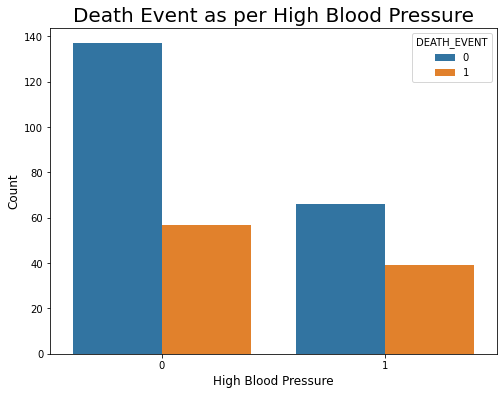

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='high_blood_pressure', hue='DEATH_EVENT')
plt.xlabel('High Blood Pressure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Death Event as per High Blood Pressure", fontsize=20)
plt.show()

In [19]:
# Smoking :
print("Smoking People     : ", df['smoking'].value_counts()[1])
print("Not Smoking People : ", df['smoking'].value_counts()[0])

Smoking People     :  96
Not Smoking People :  203


In [20]:
smoke = df[df['smoking'] == 1]
smoke_no = df[df['smoking'] == 0]

print("If a Person has Smoker,")
print("\t\t\t", smoke['DEATH_EVENT'].value_counts()[1], "people are died.")
print("\t\t\t", smoke['DEATH_EVENT'].value_counts()[0], "people are not died.")

print("If Person has Non-Smoker,")
print("\t\t\t", smoke_no['DEATH_EVENT'].value_counts()[1], "people are died.")
print("\t\t\t", smoke_no['DEATH_EVENT'].value_counts()[0], "people are not died.")

If a Person has Smoker,
			 30 people are died.
			 66 people are not died.
If Person has Non-Smoker,
			 66 people are died.
			 137 people are not died.


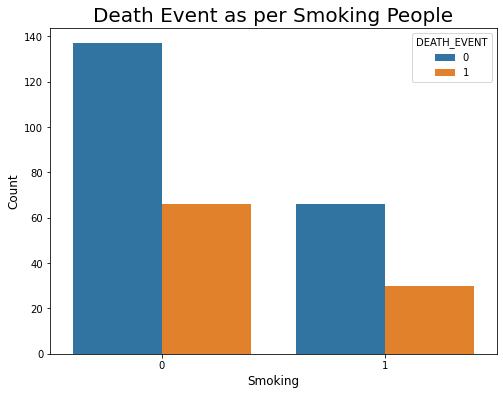

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')
plt.xlabel('Smoking', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Death Event as per Smoking People", fontsize=20)
plt.show()

In [22]:
# Gender :
men = df[df['sex'] == 1]
women = df[df['sex'] == 0]

print("There are",df['sex'].value_counts()[1], "Men out of which", men['DEATH_EVENT'].value_counts()[1], "died.")
print("There are", df['sex'].value_counts()[0], "Women out of which", women['DEATH_EVENT'].value_counts()[1], "died." )

There are 194 Men out of which 62 died.
There are 105 Women out of which 34 died.


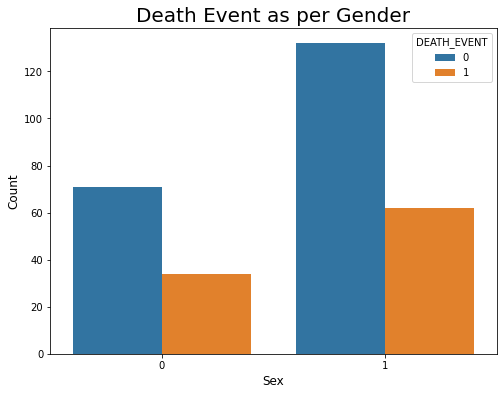

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sex', hue='DEATH_EVENT')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Death Event as per Gender", fontsize=20)
plt.show()

In [24]:
# Gender + Smoker :
men = df[df['sex'] == 1]
women = df[df['sex'] == 0]

print("There are",df['sex'].value_counts()[1], "Men out of which", men['smoking'].value_counts()[1], "are Smoker.")
print("There are",df['sex'].value_counts()[0], "Women out of which", women['smoking'].value_counts()[1], "are Smoker.")

There are 194 Men out of which 92 are Smoker.
There are 105 Women out of which 4 are Smoker.


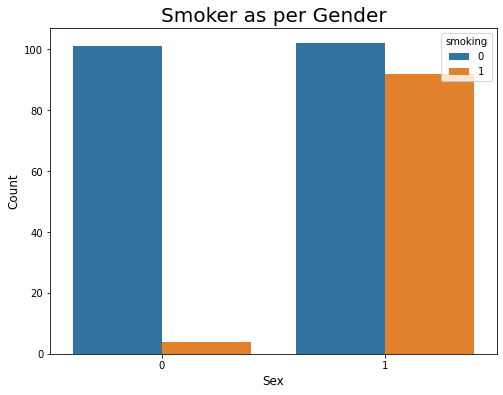

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sex', hue='smoking')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Smoker as per Gender", fontsize=20)
plt.show()

In [26]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [27]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Outliers

<Figure size 1080x864 with 0 Axes>

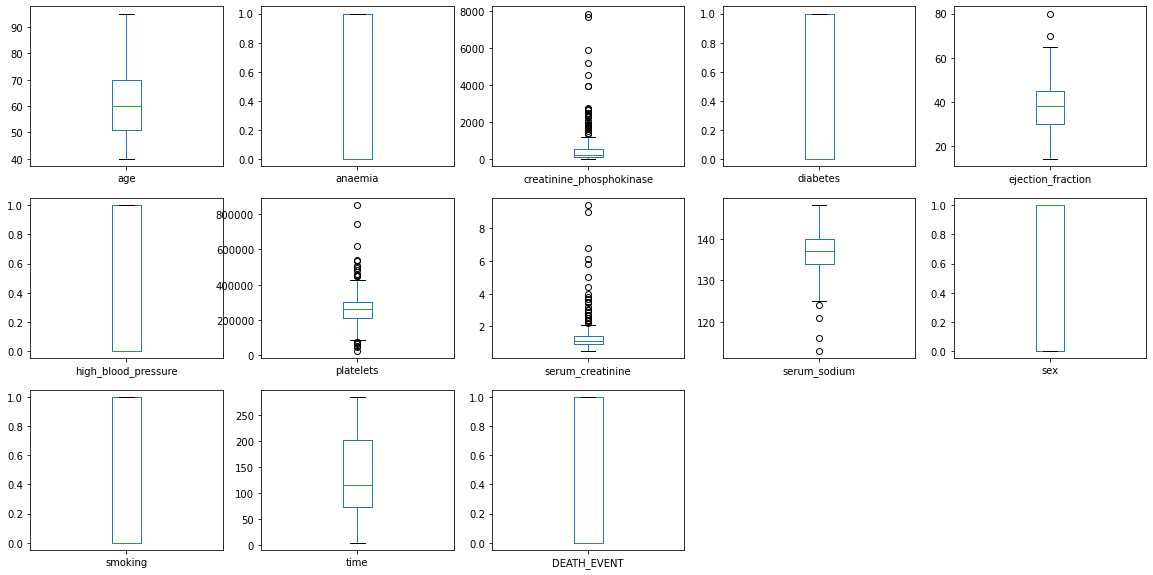

In [28]:
plt.figure(figsize=(15,12))
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(20, 10))
plt.show()

### creatinine_phosphokinase

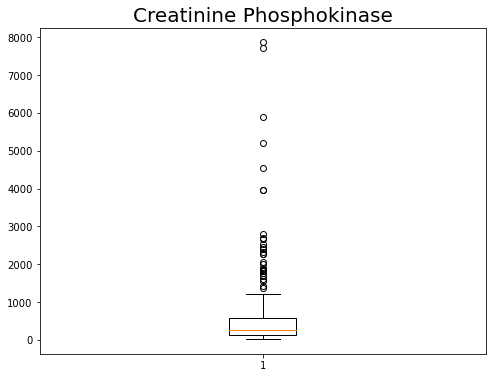

In [29]:
plt.figure(figsize=(8,6))
plt.boxplot(df[['creatinine_phosphokinase']])
plt.title("Creatinine Phosphokinase", fontsize=20)
plt.show()

- min value = 23.00
- first quartile (Q1) = 25 percentile = 116.50
- second quartile (Q2) = median = 250
- third quartile (Q3) = 75 percentile  = 582.00
- max value = 100 percentile = 7861.00

- The interquartile range (IQR) is (Q3 - Q1), 
- so IQR = 582.00 – 116.50 = 465.50

- Outliers = Q1 – 1.5*IQR  or Q3 + 1.5*IQR

- so below 581.75 and above 1280.25 values detect as Outliers for **'creatinine_phosphokinase'** columns.

### ejection_fraction

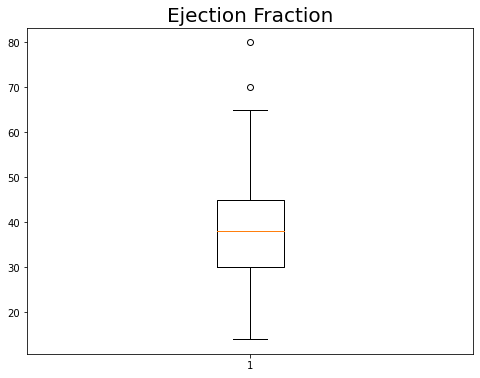

In [30]:
plt.figure(figsize=(8,6))
plt.boxplot(df[['ejection_fraction']])
plt.title("Ejection Fraction", fontsize=20)
plt.show()

- min value = 14.00
- first quartile (Q1) = 25 percentile = 30.00
- second quartile (Q2) = median = 38.00
- third quartile (Q3) = 75 percentile  = 45.00
- max value = 100 percentile = 80.00

- The interquartile range (IQR) is (Q3 - Q1), 
- so IQR = 45.00-30.00 = 15.00

- Outliers = Q1 – 1.5*IQR  or Q3 + 1.5*IQR

- so below 7.50 and above 67.50 values detect as Outliers for **'ejection_fraction'** columns.
- we clearly see that Their are only Two outliers present in 'ejection_fraction' columns 

### platelets

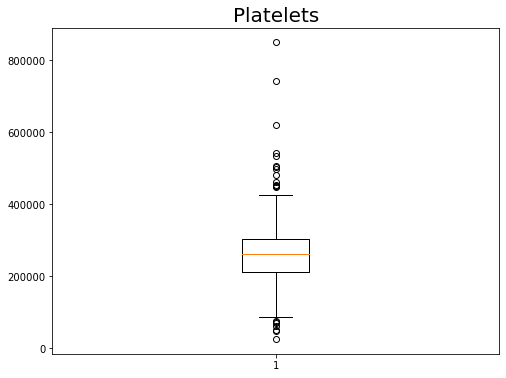

In [31]:
plt.figure(figsize=(8,6))
plt.boxplot(df[['platelets']])
plt.title("Platelets", fontsize=20)
plt.show()

In [32]:
print(len(df[df['platelets'] < 76000]))
print(len(df[df['platelets'] > 440000]))

7
14


- min value = 25100.00
- first quartile (Q1) = 25 percentile = 212500.00
- second quartile (Q2) = median = 262000.00
- third quartile (Q3) = 75 percentile  = 303500.00
- max value = 100 percentile = 850000.00

- The interquartile range (IQR) is (Q3 - Q1), 
- so IQR = 303500.00-212500.00 = 91000.00

- Outliers = Q1 – 1.5*IQR  or Q3 + 1.5*IQR

- so below 76000.00 and above 440000.00 values detect as Outliers for **'platelets'** columns.
- below 76000.00  = 7 outliers present
- above 440000.00 = 14 outliers present

### serum_creatinine

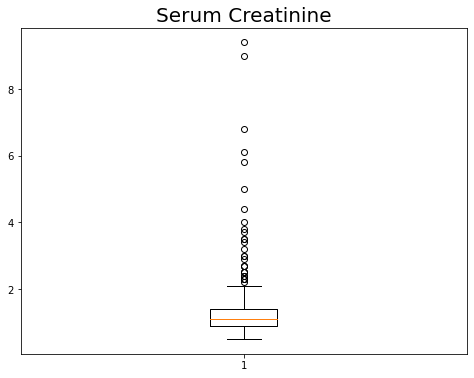

In [33]:
plt.figure(figsize=(8,6))
plt.boxplot(df[['serum_creatinine']])
plt.title("Serum Creatinine", fontsize=20)
plt.show()

In [34]:
print(len(df[df['serum_creatinine'] < 0.15]))
print(len(df[df['serum_creatinine'] > 2.15]))

0
29


- min value = 0.50
- first quartile (Q1) = 25 percentile = 0.90
- second quartile (Q2) = median = 1.10
- third quartile (Q3) = 75 percentile  = 1.40
- max value = 100 percentile = 9.40

- The interquartile range (IQR) is (Q3 - Q1), 
- so IQR = 1.40-0.90 = 0.50

- Outliers = Q1 – 1.5*IQR  or Q3 + 1.5*IQR

- so below 0.15 and above 2.15 values detect as Outliers for **'serum_creatinine'** columns.
- below 0.15  = 0 outliers present
- above 2.15 = 29 outliers present

### serum_sodium

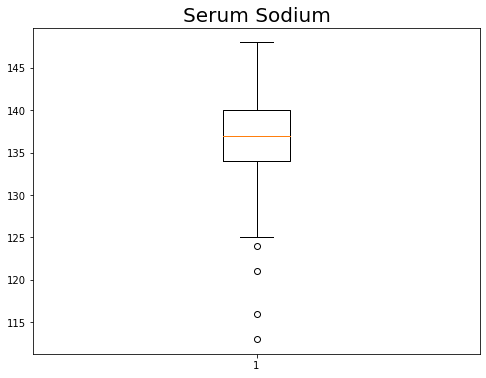

In [35]:
plt.figure(figsize=(8,6))
plt.boxplot(df[['serum_sodium']])
plt.title("Serum Sodium", fontsize=20)
plt.show()

In [36]:
print(len(df[df['serum_sodium'] < 125]))
print(len(df[df['serum_sodium'] > 149]))

4
0


- min value = 113.00
- first quartile (Q1) = 25 percentile = 134.00
- second quartile (Q2) = median = 137.00
- third quartile (Q3) = 75 percentile  = 140.00
- max value = 100 percentile = 148.00

- The interquartile range (IQR) is (Q3 - Q1), 
- so IQR = 140.00-134.00 = 6

- Outliers = Q1 – 1.5*IQR  or Q3 + 1.5*IQR

- so below 125 and above 149 values detect as Outliers for **'serum_sodium'** columns.
- below 125  = 4 outliers present
- above 149 = 0 outliers present

- I think we dont have to remove outliers, because 
1. we have to predict whether the person is death or not. It is Sensitive Data, if we remove outliers then we lose that information.

In [37]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
# Dependent Varible and Independent varible :
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

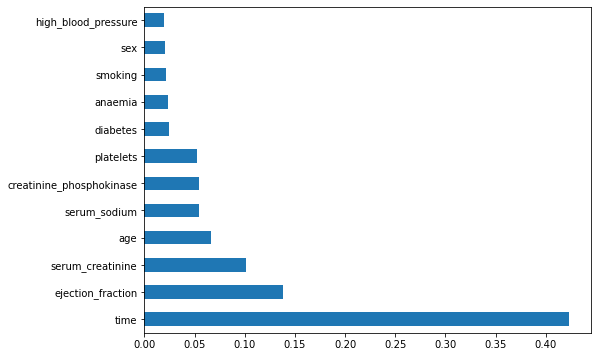

In [39]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

#plot graph of feature importances for better visualization
plt.figure(figsize=(8,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [40]:
print(feat_importances.nlargest(13)*100)

time                        42.355577
ejection_fraction           13.816053
serum_creatinine            10.178099
age                          6.645499
serum_sodium                 5.428718
creatinine_phosphokinase     5.397735
platelets                    5.240301
diabetes                     2.426879
anaemia                      2.355718
smoking                      2.117704
sex                          2.040263
high_blood_pressure          1.997454
dtype: float64


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 811)

In [42]:
print(x_train.shape)
print(x_test.shape)

(224, 12)
(75, 12)


In [43]:
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler()
X_scaled = stdscale.fit_transform(x_train)

In [44]:
X_scaled[0]

array([ 0.71234866, -0.87394481, -0.01492039, -0.84256968, -0.22265524,
       -0.73812437,  0.63882805, -0.28606491,  1.24519157, -1.42373699,
       -0.70237692,  1.46775112])

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

0.8666666666666667
[[52  2]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.87      0.62      0.72        21

    accuracy                           0.87        75
   macro avg       0.87      0.79      0.82        75
weighted avg       0.87      0.87      0.86        75



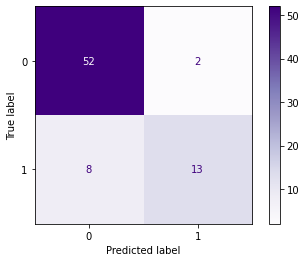

In [46]:
# Logistic Regression Classifier :
from sklearn.linear_model import LogisticRegression
LogisReg = LogisticRegression()
LogisReg.fit(X_scaled, y_train)

y_pred_LogisReg = LogisReg.predict(stdscale.transform(x_test))

print(accuracy_score(y_test, y_pred_LogisReg))
print(confusion_matrix(y_test, y_pred_LogisReg))
print(classification_report(y_test, y_pred_LogisReg))

plot_confusion_matrix(LogisReg, stdscale.transform(x_test), y_test, cmap='Purples')
plt.show()

0.7866666666666666
[[46  8]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        54
           1       0.62      0.62      0.62        21

    accuracy                           0.79        75
   macro avg       0.74      0.74      0.74        75
weighted avg       0.79      0.79      0.79        75



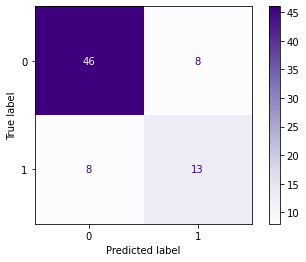

In [47]:
# Decision Tree Classifier :
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_scaled, y_train)

y_pred_dt = dt.predict(stdscale.transform(x_test))

print(accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

plot_confusion_matrix(dt, stdscale.transform(x_test), y_test, cmap='Purples')
plt.show()

0.84
[[48  6]
 [ 6 15]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        54
           1       0.71      0.71      0.71        21

    accuracy                           0.84        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.84      0.84      0.84        75



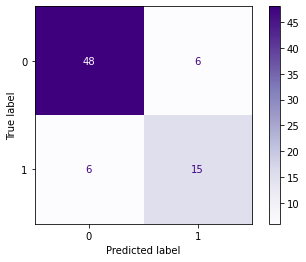

In [48]:
# Random Forest Classifier :
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier()
ran.fit(X_scaled, y_train)

y_pred = ran.predict(stdscale.transform(x_test))

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(ran, stdscale.transform(x_test), y_test, cmap='Purples')
plt.show()

0.8266666666666667
[[51  3]
 [10 11]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        54
           1       0.79      0.52      0.63        21

    accuracy                           0.83        75
   macro avg       0.81      0.73      0.76        75
weighted avg       0.82      0.83      0.81        75



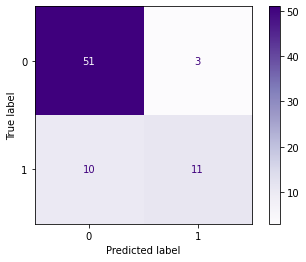

In [49]:
# KNeighbors Classifier :
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y_train)

y_pred_knn = knn.predict(stdscale.transform(x_test))

print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

plot_confusion_matrix(knn, stdscale.transform(x_test), y_test, cmap='Purples')
plt.show()

### GridSearchCV 

In [50]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

param = { 'penalty' : ['l1', 'l2', 'elasticnet'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'multi_class' : ['auto', 'ovr', 'multinomial']
            }


grid_search = GridSearchCV(estimator = LogisReg, param_grid = param, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_scaled, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.7980237154150197
{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


0.88
[[52  2]
 [ 7 14]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        54
           1       0.88      0.67      0.76        21

    accuracy                           0.88        75
   macro avg       0.88      0.81      0.84        75
weighted avg       0.88      0.88      0.87        75



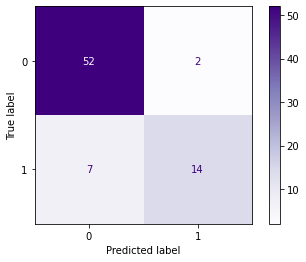

In [51]:
# After GridSearchCV Logistic Regression Classifier :
from sklearn.linear_model import LogisticRegression
LogisReg_Grid = LogisticRegression(multi_class= 'auto', penalty= 'l1', solver= 'liblinear')
LogisReg_Grid.fit(X_scaled, y_train)

y_pred_LogisReg = LogisReg_Grid.predict(stdscale.transform(x_test))

print(accuracy_score(y_test, y_pred_LogisReg))
print(confusion_matrix(y_test, y_pred_LogisReg))
print(classification_report(y_test, y_pred_LogisReg))

plot_confusion_matrix(LogisReg_Grid, stdscale.transform(x_test), y_test, cmap='Purples')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

In [ ]:
End

In [ ]:
# saving the model to the local file system
import pickle
filename = 'LogisReg.pickle'
pickle.dump(LogisReg, open(filename, 'wb'))

In [ ]:
x_train.columns

In [ ]:
y_pred